# importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np

# Importing dataset

In [2]:
df=pd.read_csv("sales.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Identify type of problem

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

As seen the problem we have to predict the sales generated from all sales channel . so this problem is regression problem

In [3]:
df.info() # information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# As seen unnamed column doesn't have any use so we can drop that column
df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# EDA

In [7]:
df.isnull().sum() # chking null values in dataset

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

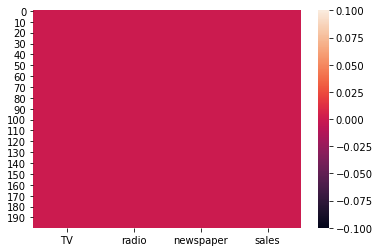

In [9]:
# heatmap corresspond to null value
sns.heatmap(df.isnull())

In [10]:
df.describe() # describe the dataset

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.corr() # correlation among data

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Distplot with all columns

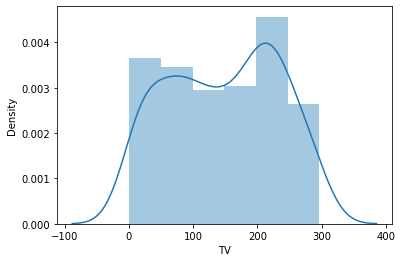

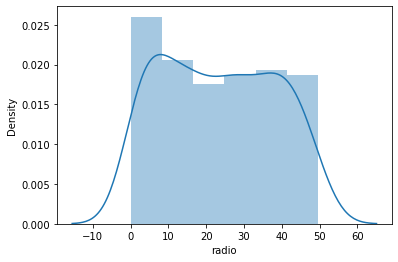

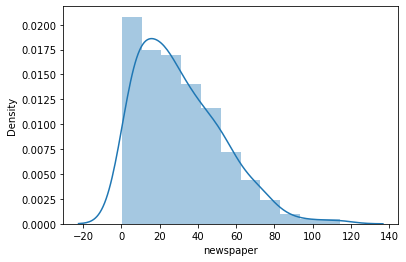

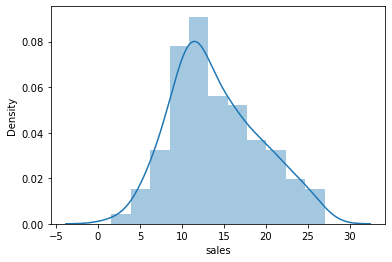

In [12]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

# scatter plot

<AxesSubplot:xlabel='TV', ylabel='sales'>

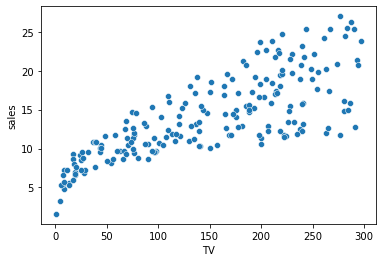

In [13]:
# plot between tv and sales
sns.scatterplot(x="TV",y="sales",data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

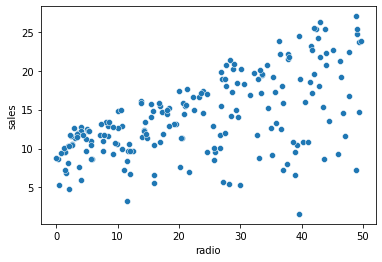

In [14]:
# plot between radio and sales
sns.scatterplot(x="radio",y="sales",data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

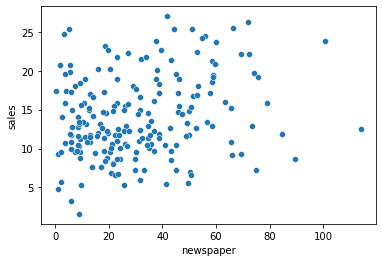

In [15]:
#plot between sales and newspaper
sns.scatterplot(x="newspaper",y="sales",data=df)

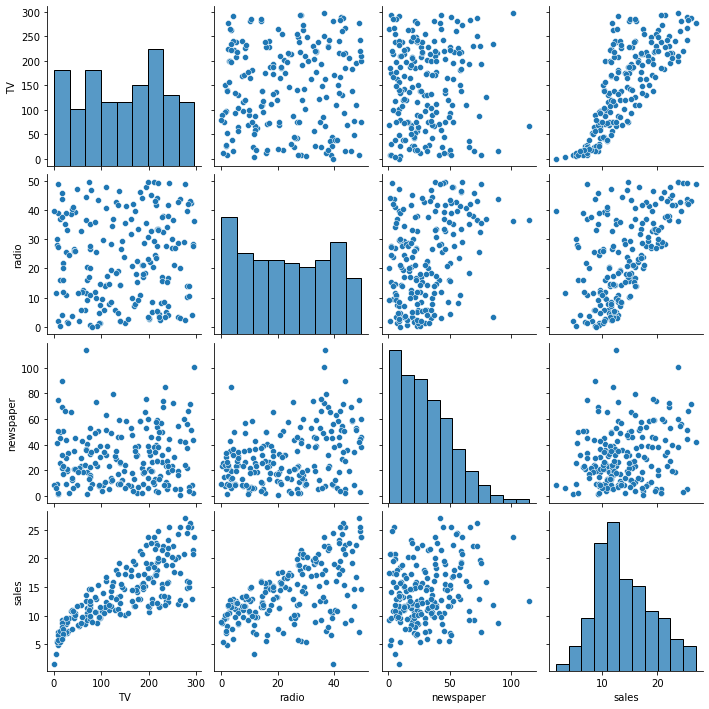

In [16]:
sns.pairplot(df)
#from the below figure its observed that somewhat linear relationship
# TV and sales
# radio and sales
# newspaper and sales had very random relationship 
#The same can be observed with above correlation matrix

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

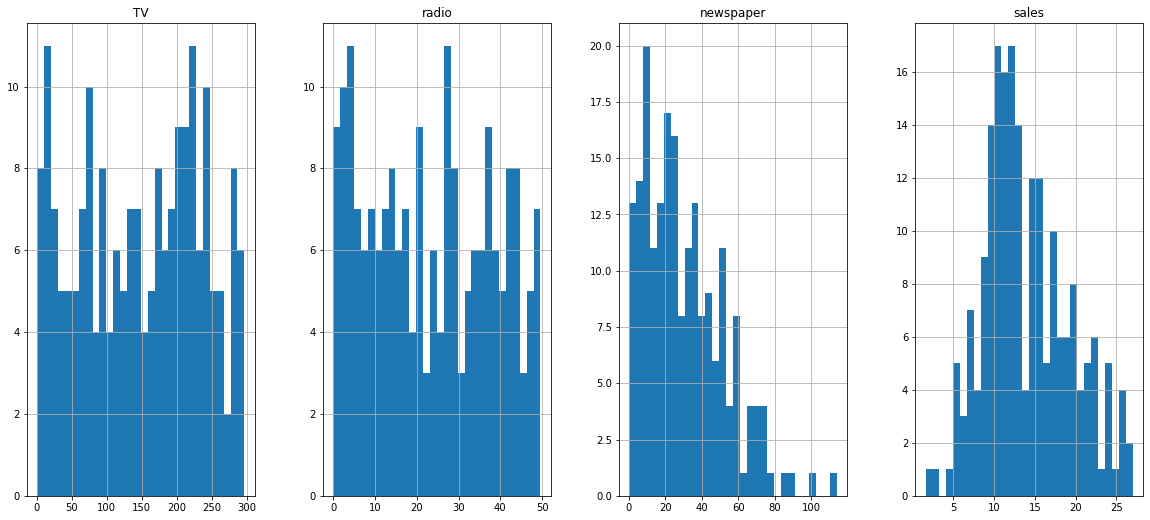

In [17]:
# histograms of all columns
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [18]:
#lets chk the skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:>

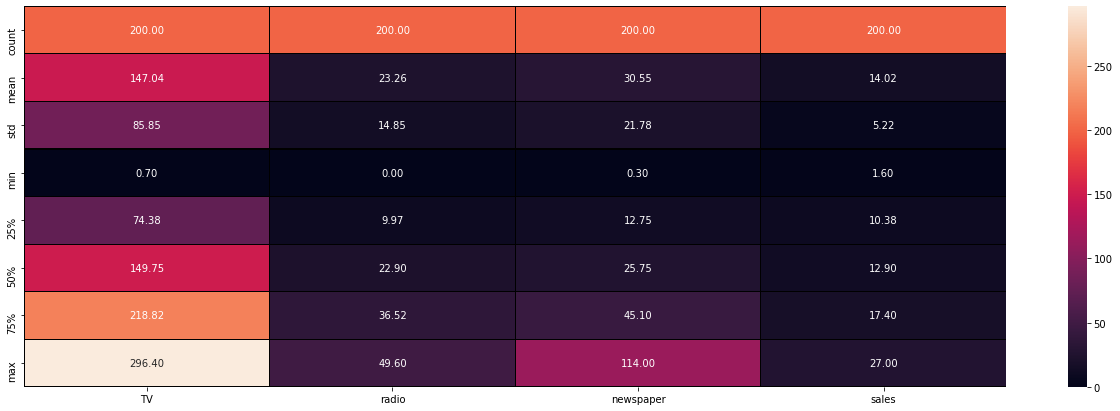

In [19]:
# plotting heatmap of describe of data
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

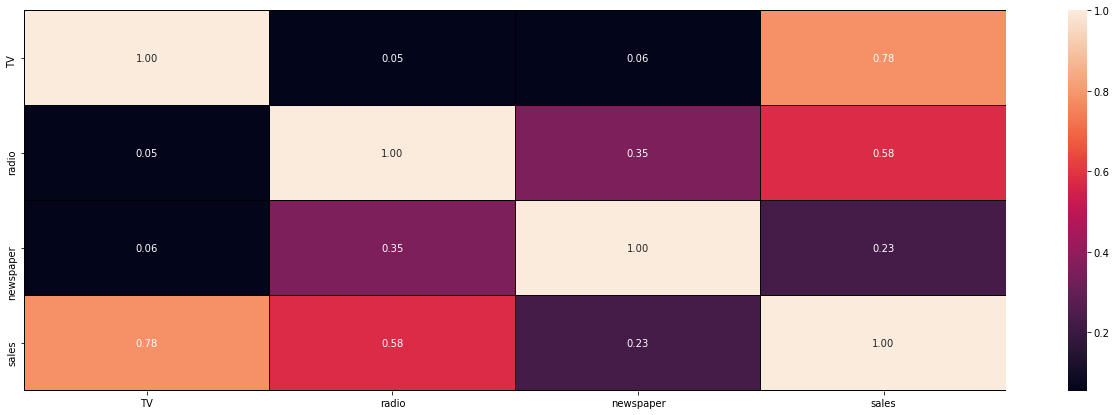

In [20]:
# finding the corelation by heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

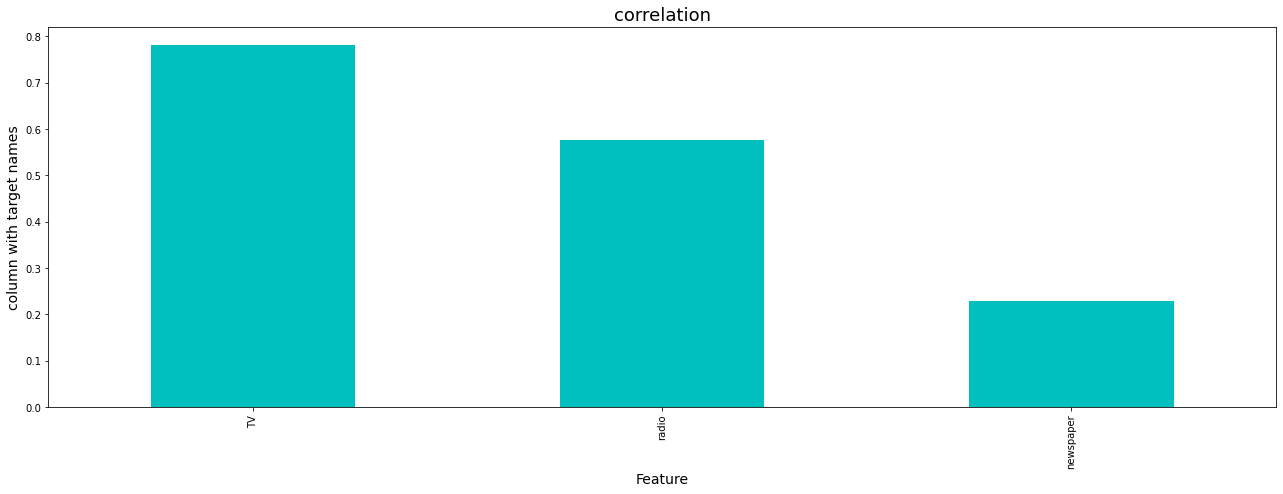

In [21]:
#plotting  bargraph with features and target values
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


# Lets chk the outliers

TV              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
radio        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
newspaper    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
sales        AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
dtype: object

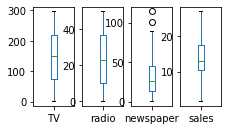

In [22]:
df.plot(kind='box',subplots=True,layout=(2,7))

In [23]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [24]:
threshold=3
print(np.where(z>3))

(array([ 16, 101]), array([2, 2]))


In [25]:
df_new=df[(z<3).all(axis=1)]


In [26]:
df_new #dataset after removing outliers

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [27]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# skewness of data

In [28]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# importing all metrics

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Dividing X and y
y=df[['sales']]
x=df.drop(['sales'], axis = 1)

# Standard scalar

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Training and testing

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [32]:
x_train.shape

(134, 3)

In [33]:
x_test.shape

(66, 3)

In [34]:
y_train.shape

(134, 1)

In [35]:
y_test.shape

(66, 1)

# Linear Regression

In [36]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [37]:
lm.coef_

array([[3.82509108, 2.91202155, 0.13196062]])

In [38]:
lm.intercept_

array([14.08574121])

In [39]:
lm.score(x_train,y_train)

0.9095216639030753

In [46]:
#cross validation of linear regression
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lm,x,y,cv=3,scoring='r2')
pred=lm.predict(x_test)
print("cross validation score of linear model:",scr.mean())
print("r2 score is",r2_score(y_test,pred))

cross validation score of linear model: 0.8916464591145559
r2 score is 0.8555568430680085


# Regularization- Lasso and Ridge

In [47]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
print("r2 score is",r2_score(y_test,pred))

r2 score is 0.7956207806870734


In [48]:
ls.coef_

array([2.83855363, 2.0321326 , 0.        ])

In [49]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred = rd.predict(x_test)

print("r2 score is",r2_score(y_test,pred))

r2 score is 0.8553811955899528


In [50]:
rd.coef_

array([[3.79584941, 2.89024232, 0.14055831]])

# ElasticNet


In [51]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
enr.fit(x_train,y_train)
pred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_


0.7498988475102839


array([2.20888158, 1.7088623 , 0.07513512])

In [52]:
print('error :')
print(mean_squared_error(y_test,pred))

error :
7.935463485758963


In [53]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6925307312997548


# RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
rfr.score(x_train,y_train)

0.9958633689357848

In [56]:
print("r2 score is",r2_score(y_test,pred))

r2 score is 0.6925307312997548


In [57]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# SVR

In [58]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8740292370442434


# KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9019729852695847


# Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9335149970402188


# Lets chk the cross validation

In [61]:
# cross validation of svr model
scr = cross_val_score(svr,x,y,cv=3,scoring='r2')
print("cross validation score of svr model:",scr.mean())

cross validation score of svr model: 0.8936448711495876


In [62]:
# cross validation of dtr model
scr = cross_val_score(dtr,x,y,cv=3,scoring='r2')
print("cross validation score of svr model:",scr.mean())

cross validation score of svr model: 0.9487990092308342


In [63]:
# cross validation of rfr model
scr = cross_val_score(rfr,x,y,cv=3,scoring='r2')
print("cross validation score of svr model:",scr.mean())

cross validation score of svr model: 0.9746165771324565


In [64]:
# cross validation of knr model
scr = cross_val_score(knr,x,y,cv=3,scoring='r2')
print("cross validation score of knr model:",scr.mean())

cross validation score of knr model: 0.9192824548711956


#The difference between r2 score and cross validation score of decision tree is low comparitively with all other algos
#therefore we usr dtr

# Hyperparameter Tuning

In [65]:
#parameters of dtr
parameter ={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "splitter":["best", "random"]}

In [66]:
gcv=GridSearchCV(dtr,parameter,cv=3)

In [67]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']})

In [68]:
# best parameters
gcv.best_params_

{'criterion': 'friedman_mse', 'splitter': 'best'}

# Final model

In [69]:
final_mod =DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

94.89841345942163


Therefore we can see that model accuracy improves from 93% to 94.89%

# Saving the final model

In [72]:
#saving the final model
import joblib
joblib.dump(dtr,"FinalModel5.pkl")

['FinalModel5.pkl']